In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
base = pd.read_csv('/content/dataset.csv')

In [3]:
base = base.drop_duplicates()
base = base.dropna()

In [4]:
conditionlist = [base['popularity'] >= 80, base['popularity'] < 80]
choicelist = [1,0]
base['popularity'] = np.select(conditionlist, choicelist, default=0)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(base['track_genre'])
base['track_genre'] = le.transform(base['track_genre'])
le.fit(base['explicit'])
base['explicit'] = le.transform(base['explicit'])
base

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0,210826,0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0,201933,0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,198853,0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,0,384999,0,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,0,385000,0,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,0,271466,0,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,0,283893,0,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


In [6]:
x = base[['track_genre', 'popularity', 'duration_ms', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'explicit']]
x = (x - x.min())/(x.max() - x.min())
xTrain, xTeste = train_test_split(x, test_size=0.25, random_state=42)

In [7]:
xTrain.popularity.value_counts(normalize=True)

0.0    0.98924
1.0    0.01076
Name: popularity, dtype: float64

In [8]:
xTeste.popularity.value_counts(normalize=True)

0.0    0.99014
1.0    0.00986
Name: popularity, dtype: float64

In [9]:
a = xTrain.drop('popularity', axis=1)
b = xTrain.popularity

In [10]:
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
for trainIndex, testeIndex in StratifKfold.split(a, b):
    xTrain, xTeste = a.iloc[trainIndex], a.iloc[testeIndex]
    yTrain, yTeste = b.iloc[trainIndex], b.iloc[testeIndex]


In [12]:
from sklearn.linear_model import LogisticRegression
treino = LogisticRegression().fit(xTrain, yTrain)

In [13]:
prevTreino = treino.predict(xTrain)
prevTeste = treino.predict(xTeste)

In [14]:
aux = x.drop(columns='popularity')

In [15]:
data = {
    "Features": aux.columns,
    "Coef": treino.coef_.tolist()[0]
}

df = pd.DataFrame(data)
df

,Features,Coef
0,track_genre,0.305532
1,duration_ms,-0.728036
2,danceability,2.208421
3,key,0.125112
4,loudness,2.804284
5,mode,-0.168849
6,speechiness,-2.142953
7,acousticness,-0.862254
8,instrumentalness,-2.547052
9,liveness,-1.691089


In [16]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yTrain, prevTreino)

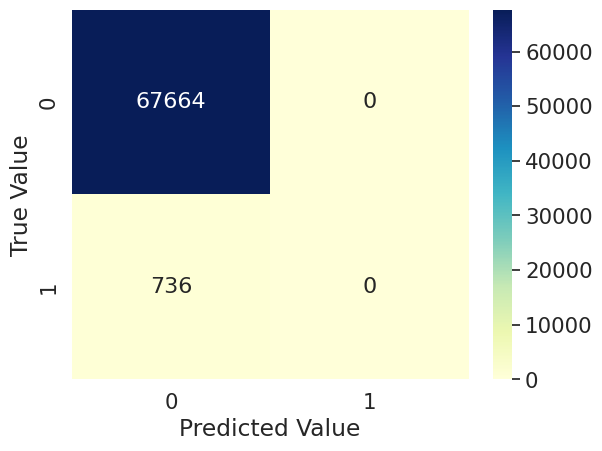

In [17]:
sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(conf_matrix,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

In [18]:
conf_matrix = confusion_matrix(yTeste, prevTeste)

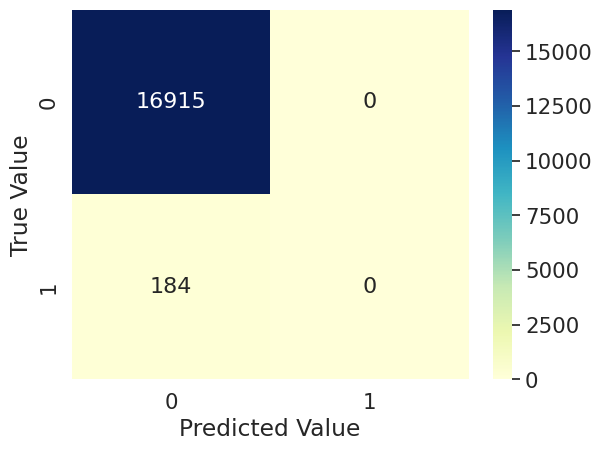

In [19]:
sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(conf_matrix,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

In [20]:
from sklearn.metrics import precision_recall_fscore_support, f1_score, accuracy_score, precision_score, recall_score

In [21]:
print(accuracy_score(yTrain, prevTreino))
print(f1_score(yTrain, prevTreino))
print(recall_score(yTrain, prevTreino))
print(precision_score(yTrain, prevTreino, zero_division=0))

0.9892397660818714
0.0
0.0
0.0


In [22]:
print(accuracy_score(yTeste, prevTeste))
print(f1_score(yTeste, prevTeste))
print(recall_score(yTeste, prevTeste))
print(precision_score(yTeste, prevTeste, zero_division=0))

0.9892391367916252
0.0
0.0
0.0


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [24]:
classificadores = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

In [25]:
from imblearn.under_sampling import NearMiss, RandomUnderSampler
undersample = NearMiss()
xUnder, yUnder = undersample.fit_resample(xTrain, yTrain)

from collections import Counter
counter = Counter(yUnder)
print(counter)

Counter({0.0: 736, 1.0: 736})


In [26]:
for nome, model in classificadores.items():
    
    model.fit(xUnder, yUnder)
    prevTreino = model.predict(xTeste)
    
    print(f'Modelo - {nome}')
    print(f"accuracy:  {accuracy_score(yTeste, prevTreino)}")
    print(f"precision: {precision_score(yTeste, prevTreino)}")
    print(f"recall:    {recall_score(yTeste, prevTreino)}")
    print(f"f1:        {f1_score(yTeste, prevTreino)}")
    print('___' * 20)
    print('\n')

Modelo - LogisiticRegression
accuracy:  0.24352301304169835
precision: 0.008328834734325595
recall:    0.5869565217391305
f1:        0.016424606493802753
____________________________________________________________


Modelo - KNearest
accuracy:  0.24018948476519095
precision: 0.009196811771919068
recall:    0.6521739130434783
f1:        0.018137847642079805
____________________________________________________________


Modelo - DecisionTreeClassifier
accuracy:  0.24463418913386747
precision: 0.011959521619135235
recall:    0.8478260869565217
f1:        0.023586332022981552
____________________________________________________________


Modelo - Random Forest
accuracy:  0.1215860576641909
precision: 0.010556875164951175
recall:    0.8695652173913043
f1:        0.020860495436766626
____________________________________________________________




In [27]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
oversample_smote = SMOTE(sampling_strategy='minority')
xOver, yOver = oversample_smote.fit_resample(xTrain, yTrain)

counter = Counter(yOver)
print(counter)

Counter({0.0: 67664, 1.0: 67664})


In [28]:
for nome, model in classificadores.items():
    
    model.fit(xOver, yOver)
    prevTreino = model.predict(xTeste)
    
    print(f'Modelo - {nome}')
    print(f"accuracy:  {accuracy_score(yTeste, prevTreino)}")
    print(f"precision: {precision_score(yTeste, prevTreino)}")
    print(f"recall:    {recall_score(yTeste, prevTreino)}")
    print(f"f1:        {f1_score(yTeste, prevTreino)}")
    print('___' * 20)
    print('\n')

Modelo - LogisiticRegression
accuracy:  0.6471723492601906
precision: 0.02112330112985099
recall:    0.7010869565217391
f1:        0.041010968049594664
____________________________________________________________


Modelo - KNearest
accuracy:  0.915550616995146
precision: 0.05319148936170213
recall:    0.4076086956521739
f1:        0.09410288582183186
____________________________________________________________


Modelo - DecisionTreeClassifier
accuracy:  0.9613427685829581
precision: 0.1044776119402985
recall:    0.3423913043478261
f1:        0.16010165184243963
____________________________________________________________


Modelo - Random Forest
accuracy:  0.9871922334639452
precision: 0.39766081871345027
recall:    0.3695652173913043
f1:        0.38309859154929576
____________________________________________________________




In [29]:
xTrainArr = xTrain.values
xTesteArr = xTeste.values
yTrainArr = yTrain.values
yTesteArr = yTeste.values

In [30]:
nArvores = [3, 5, 10, 100]
featuresSplits = [3, 4, 5, 6, None]
niveisArvore = [3, 4, 5, 6, None]
pesoClasse = ['balanced', None]
paramDic = {'n_estimators': nArvores, 'max_features': featuresSplits, 'max_depth': niveisArvore, 'class_weight': pesoClasse}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
import time
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve, average_precision_score

accuracy = []
precision = []
recall = []
f1 = []
auc = []

rf_grid = RandomizedSearchCV(RandomForestClassifier(), paramDic, random_state=42)

start = time.time()
count = 0

for train, test in StratifKfold.split(xTrainArr, yTrainArr):
    
    pipeline_rf = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), rf_grid)
    
    model_rf = pipeline_rf.fit(xTrainArr[train], yTrainArr[train])
    
    best_est_rf = rf_grid.best_estimator_
    
    prediction_rf = best_est_rf.predict(xTrainArr[test])
    
    accuracy.append(pipeline_rf.score(xTrainArr[test], yTrainArr[test]))
    precision.append(precision_score(yTrainArr[test], prediction_rf))
    recall.append(recall_score(yTrainArr[test], prediction_rf))
    f1.append(f1_score(yTrainArr[test], prediction_rf))
    auc.append(roc_auc_score(yTrainArr[test], prediction_rf))
    
    count = count + 1
    print(f"kfold nº: {count}")
    
    intervalo = time.time()
    print(f"Tempo da iteração: {(intervalo - start)/60:.1f} minutos")
    print()

print('___' * 20)
print(f"Melhores estimadores para RF: {rf_grid.best_params_}")

print('___' * 20)
print('Resultados')
print(f"accuracy:  {np.mean(accuracy)}")
print(f"precision: {np.mean(precision)}")
print(f"recall:    {np.mean(recall)}")
print(f"f1:        {np.mean(f1)}")
print(f"AUC:       {np.mean(auc)}")
print('___' * 20)

end = time.time()
print(f"Tempo final: {(end - start)/60:.1f} minutos")

kfold nº: 1
Tempo da iteração: 4.6 minutos

kfold nº: 2
Tempo da iteração: 9.1 minutos

kfold nº: 3
Tempo da iteração: 13.6 minutos

kfold nº: 4
Tempo da iteração: 18.2 minutos

kfold nº: 5
Tempo da iteração: 22.7 minutos

____________________________________________________________
Melhores estimadores para RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}
____________________________________________________________
Resultados
accuracy:  0.9874561403508771
precision: 0.36697842090919575
recall:    0.22142857142857145
f1:        0.2758803745167235
AUC:       0.6086082973942555
____________________________________________________________
Tempo final: 22.7 minutos
